## Imports

In [2]:
import random
import pandas as pd
import numpy as np
import os

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings(action = "ignore")

## Fixed RandomSeed

In [3]:
def seed_everything(seed) :
    """
    파이썬 시드 설정
    """
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(42)

## Load Data & Pre-Processing

In [ ]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

df_train = df_train.rename({pre:new for pre, new in zip(df_train.columns, ["num_date_time", "build_num", "date", "temp", "precip", "wind", "humidity", "sunhour", "sunweight", "power"])}, axis = 1)
df_test = df_test.rename({pre:new for pre, new in zip(df_test.columns, ["num_date_time", "build_num", "date", "temp", "precip", "wind", "humidity", "sunhour", "sunweight"])}, axis = 1)

In [14]:
df_train["month"] = df_train["date"].apply(lambda x : int(x[4:6]))
df_train["day"] = df_train["date"].apply(lambda x : int(x[6:8]))
df_train["time"] = df_train["date"].apply(lambda x : int(x[9:11]))

df_test["month"] = df_test["date"].apply(lambda x : int(x[4:6]))
df_test["day"] = df_test["date"].apply(lambda x : int(x[6:8]))
df_test["time"] = df_test["date"].apply(lambda x : int(x[9:11]))

In [20]:
X = df_train.drop(["num_date_time", "date", "sunhour", "sunweight", "power"], axis = 1)
y = df_train.power

XX = df_test.drop(["num_date_time", "date"], axis = 1)

## Train

In [21]:
model = XGBRegressor()
model.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Prediction

In [22]:
yyhat = model.predict(XX)

## Submission

In [23]:
df_submission = pd.read_csv("./sample_submission.csv")
df_submission["answer"] = yyhat

In [25]:
df_submission.to_csv("./baseline_submission.csv", index = False)

## Score : SMAPE

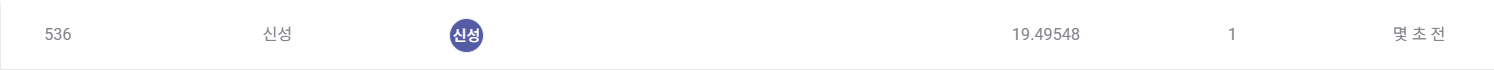

* **19.49548**